In [1]:
with open("France.txt", "r", encoding="utf-8") as f:
    ebook = f.read()

In [2]:
import re
#filtering only words using pattern matching
pattern = re.compile("[a-zA-Z]+")
findings = re.findall(pattern, ebook.lower())
findings[:7] #viewing first 7 words

['the', 'project', 'gutenberg', 'ebook', 'of', 'my', 'four']

In [3]:
len(findings)

35327

In [4]:
#counting the number of occurance of each word
dt = {}
for word in findings:
    if word not in dt.keys():
        dt[word]=1
    else:
        dt[word]=dt[word]+1
#dt

In [6]:
#converting dictionary to list of tuples using list comprehension
d_lst=[(value, key) for (key, value) in dt.items()]
#sorted in descending to get words with highest occurance
d_lst=sorted(d_lst, reverse=True) 
d_lst[:7]

[(2055, 'the'),
 (1107, 'and'),
 (1080, 'to'),
 (938, 'a'),
 (803, 'i'),
 (782, 'of'),
 (590, 'in')]

In [7]:
import nltk
from nltk.corpus import stopwords
eng_stopwords=stopwords.words("english")
#eng_stopwords

In [8]:
#extracting list of tuples filtered stopwords
filtered_lst=[]
filtered_words=[]
for count, word in d_lst:
    if word not in eng_stopwords:
        filtered_lst.append((count, word))
        filtered_words.append(word)
filtered_lst[:7]

[(241, 'said'),
 (188, 'one'),
 (99, 'mr'),
 (97, 'gutenberg'),
 (92, 'us'),
 (89, 'project'),
 (85, 'french')]

In [9]:
#to get bag of positive and negetive words from library
import nltk
nltk.download('opinion_lexicon')

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

In [10]:
from nltk.corpus import opinion_lexicon

positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

pos=neu=neg=0
for item in filtered_lst:
    #print(item[0], item[1])
    if item[1] in positive_words:
        pos=pos+item[0]
    elif item[1] in negative_words:
        neg=neg+item[0]
    else:
        neu=neu+item[0]

print("pos: ",pos,"neg: ",neg,"neu: ",neu)

pos:  846 neg:  675 neu:  15749


In [11]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

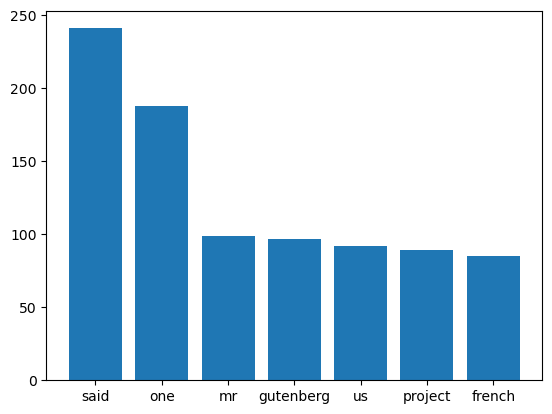

In [12]:
count, word = zip(*filtered_lst)
count=(count[:7])
word=(word[:7])

plt.bar(word, count)
plt.show()